In [1]:
import matplotlib.pyplot as plt
import json

In [10]:
DATAFOLDER = "models/n_trace_scores"

IMPLEMENTATION = "fixslice"
PREDICTION_TARGET = ["sbox", "sbox2", "2sbox", "combo"]
BYTE = [1]
ARCH = "zhang"
TRACE_START = 0
TRACE_END = 1000

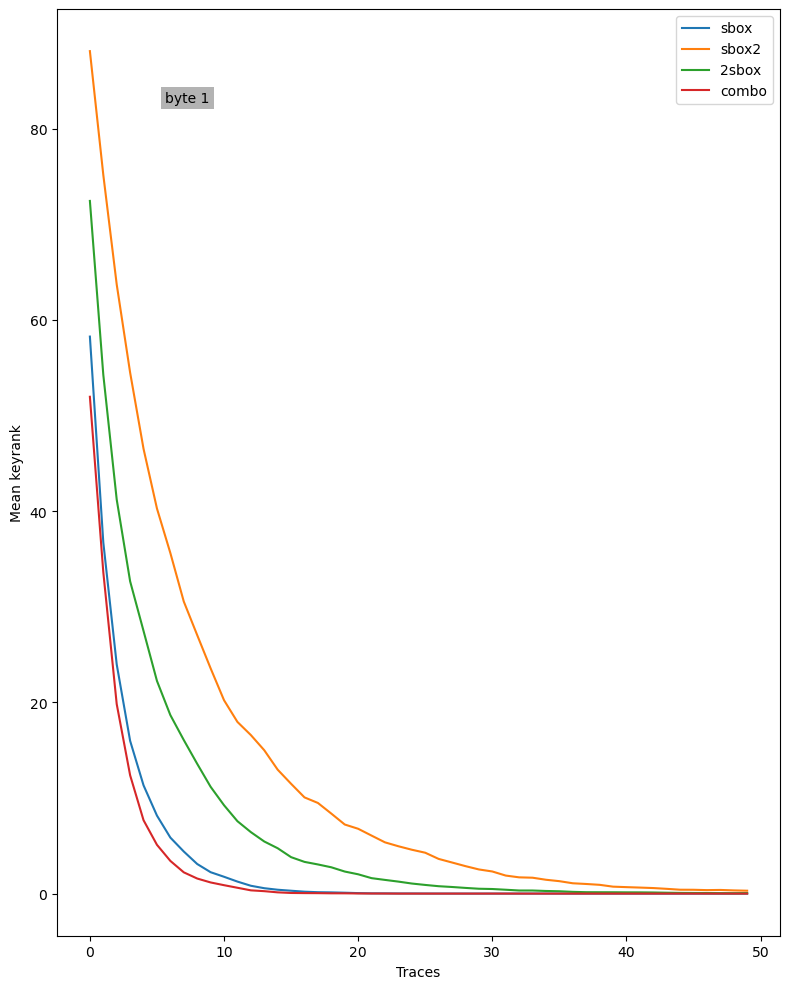

In [13]:
fig, axs = plt.subplots(1, 1)

for idx, byte in enumerate(BYTE):
    ax = axs
    for target in PREDICTION_TARGET:

        model_name = f"{IMPLEMENTATION}-{target}-byte{byte}-{ARCH}-{TRACE_START}_{TRACE_END}"

        with open(f"{DATAFOLDER}/{model_name}.json", 'r') as f:

            json_obj = json.load(f)

            ranks = json_obj["per_trace_ranks"]


        ax.plot(ranks[:50], label=f"{target}")

    ax.annotate(
        f"byte {byte}",
        xy=(0.15,0.9),
        xycoords='axes fraction',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0),
    )
    ax.legend()
    ax.set_ylabel("Mean keyrank")
    ax.set_xlabel("Traces")

fig.set_figheight(10.0)
fig.set_figwidth(8.0)

fig.tight_layout()

plt.show()
